Time Taken for Sorting:  0:00:00.537814
Enter Title to search: 
Time Taken for Searching:  0:00:00.000979
Book 				  Author 				 ISBn13
You bright and risen angels 	 William T. Vollmann 	 9780140110876


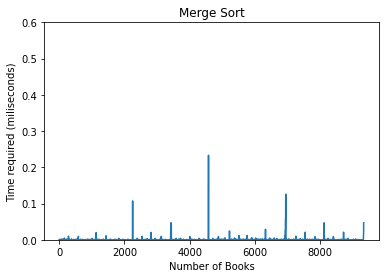

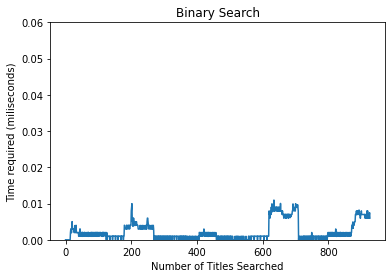

In [21]:
import csv
import sys
import matplotlib.pyplot as plt
import numpy as np
import timeit
import time
from datetime import datetime

# To store sorting time
sortTime = []

# Helper function to print all the matching books
def helper(arr, x, l, r):
    list1 = []
    # Check to keep the track of book
    found = True
    # For loop to iterate through the list
    for i in range(l, r):
        # Check to keep track of matching the target with the j-th item of the list
        check = True;
        # For loop to iterate through the target word and j-th item of the list
        for j in range (len(x)):
            if (j > len(arr[i][1]) - 1):
                check = False;
                break;
            # If a letter mismatches
            if x[j].capitalize() != arr[i][1][j].capitalize():
                # Setting check to false, shows that the words did not match
                check = False;
                # Breaking the loop
                break
        # If the words match
        if check:
            list1.append(arr[i])
            # Setting the check to false to avoid printing the header again
            found = False
    return list1

# Function to search the list using Binary Search
def binarySearch(arr, x):
    # Initializing Variables
    l = 0
    r = len(arr)
    check = 0
    check2 = 0

    # While end point is greater than the starting point
    while (l <= r):
        # Calculating the midpoint of the list
        m = l + ((r - l) // 2)

        # Check if x is present at mid
        if  (" " + x + " ") in (" "+ arr[m][1] + " "):
            return m - 1
        # If the first letter of target and midpoint item match
        if x[0] == arr[m][1][0]:
            # Calling the helper function to search the list for matching books
            list1 = helper(arr, x, l, r)
            return list1
        # If x greater, ignore left half
        if x[0] > arr[m][1][0]:
            l = m + 1

        # If x is smaller, ignore right half
        else:
            r = m - 1

# Merge sort in Python
def mergeSort(nlist):
#     Noting time before the sorting of item begins
    start_time = time.time()
    # If list has more than 1 element
    if len(nlist) > 1:
        # Finding the midpoint of the list
        mid = len(nlist) // 2
        # List from starting to the midpoint
        lefthalf = nlist[:mid]
        # List from midpoint to the midpoint
        righthalf = nlist[mid:]

        # Recursion for the left half of the list
        mergeSort(lefthalf)
        # Recursion for the right half of the list
        mergeSort(righthalf)
        # Initializing new variables to keep track
        i = j = k = 0

        # While the midpoint does not reach the 0th index or the last index
        while i < len(lefthalf) and j < len(righthalf):
          # If title of left half is less then the title of the right half
          if str(lefthalf[i]).split(",")[1] < str(righthalf[j]).split(",")[1] :
            # Appending the i-th item of the left half of the list
            nlist[k] = lefthalf[i]
            # Incrementing the value of i
            i = i + 1
          # Else if the title of the right half is less than the title of the left half
          else:
            # Appending the j-th item of the right half of the list
            nlist[k] = righthalf[j]
            # Incrementing the value of j
            j = j + 1
          # Incrementing the value of k, k is the index counter for nlist
          k = k + 1

        # While i is less than the length of the left half
        while i < len(lefthalf):
            # Appending the i-th item of the left list to nlist
            nlist[k] = lefthalf[i]
            # Incrementing the value of i and k
            i = i + 1
            k = k + 1

        # While j is less than the length of the right half of the list
        while j < len(righthalf):
            # Appending the j-th item of the right list to nlist
            nlist[k] = righthalf[j]
            # Incrementing the value of j and k
            j = j + 1
            k = k + 1
            # Returning the sorted list
#             After the item is sorted, calculating the time taken to sort it and storing it in sortTime 
            elapsed_time = time.time() - start_time
            sortTime.append(elapsed_time)
    return nlist

# Function to convert string to list
def splitArray(arr):
    # Creating a temporary list
    my_arr = []

    # Loop to iterate through the list
    for i in arr:
        # Spliting the string using ','
        temp = str(i).split(',')
        # Removing extra spaces from the beginning and the end of the string
        temp[1] = temp[1].strip()
        # Capitalizing the string
        temp[1] = temp[1].capitalize()
        # Removing the redundant '\n' from the list
        temp.pop(-1)
        # Appending the list to my_arr
        my_arr.append(temp)
    # Returning the new 2D list
    return my_arr

# This function prints the array
def arrPrint(arr):
    print("Book", "\t\t\t\t" ," Author", "\t\t\t\t", "ISBn13")
    # For loop to iterate through the array
    for i in arr:
        # Printing the Title, Author, and ISBN13
        print(i[1], "\t", i[2], "\t", i[5])

# Reading from the cdv file
with open("booksdatabasenew2.csv", 'r', encoding="utf-8") as file:
    # Adding the lines to the variable
    content = file.readlines()

# Storing the header column of the csv file
header = content[:1]
# Storing the data of the csv file
rows = content[1:]

# Converting the string to list
header = splitArray(header)
rows = splitArray(rows)

# Getting time before sorting
t1 = datetime.now()
# Calling sorting function
row = mergeSort(rows)
# Getting the time after sorting
t2 = datetime.now()
# Calculating the time taken to sort the list
T = t2 - t1

print ("Time Taken for Sorting: ", T)
print("Enter Title to search: ")

# Searching variable
x = "You Bright and Risen Angels"

# Getting time before search
t1 = datetime.now()
# Calling searching function
list1 = binarySearch(row, x)
# Getting the time after search
t2 = datetime.now()
# Calculating the time taken to search for a title in the list
T = t2 - t1
print ("Time Taken for Searching: ", T)
# Printing the list of books returned after search
if len(list1) > 0:
    arrPrint(list1)



# Code to plot graph for Merge sort
x=[i for i in range(0,len(sortTime))]
%matplotlib inline
plt.ylim(0,0.6)
# giving a title to my graph
plt.title('Merge Sort')
plt.xlabel("Number of Books")
plt.ylabel("Time required (miliseconds)")
plt.plot(x,sortTime)
# function to show the plot
plt.show()

# To store searching time
times = []

# Loop to search for 1/12-th part of the list to calculate the run time of searching algorithm
for x in range(len(row)//12):
#     When searching begins
    start_time = time.time()
#     Calling function
    binarySearch(row, row[x][1])
#     Storing the time taken when searching is completed
    elapsed_time = time.time() - start_time
    times.append(elapsed_time)
    
# Code to plot graph for Binary Search
x=[i for i in range(0,len(times))]
%matplotlib inline
plt.ylim(0,0.06)
# giving a title to my graph
plt.title('Binary Search')
plt.xlabel("Number of Titles Searched")
plt.ylabel("Time required (miliseconds)")
plt.plot(x,times)
# function to show the plot
plt.show()